# Project Name: G2M Insights For Cab Investment firm

# Analyst Name: Gideon Osei Bonsu

#### I will be using the following Data Analysis Cycle in my analysis:
#### 1. Ask
#### 2. Prepare
#### 3. Process
#### 4. Analyze
#### 5. Share
#### 6. Act

## Scenario

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Project Delivery

Having been provided with [multiple datasets](https://github.com/DataGlacier/DataSets) that contain information on 2 cab companies from **31/01/2016 to 31/12/2018**, XYZ is interested in using actionable insights derived from my analysis to help them identify the right company to make their investment.

My goal is to analyze the given datasets to ascertain the best investment option for XYZ.

## PHASE 1: ASK

The guiding questions of this analysis include:
* Which company has maximum cab users at a particular time period?
* Does margin proportionally increase with increase in number of customers?
* What are the attributes of these customer segments?
* Is there any seasonality in number of customers using the cab service?



## PHASE 2: PREPARE

***Importing Needed Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go
from collections import Counter
from IPython.display import display
import plotly.io as pio




warnings.filterwarnings("ignore")

***Reading Datasets***

In [2]:
cab_data = pd.read_csv('Dataset/Cab_Data.csv')
city_data = pd.read_csv('Dataset/City.csv')
customer_data = pd.read_csv('Dataset/Customer_ID.csv')
transaction_data = pd.read_csv('Dataset/Transaction_ID.csv')

## PHASE 3: PROCESS

**Check how data looks like**, starting with the cab_data dataset

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


**Check the structure of the dataset**

In [4]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


**Check for null values in each column**

In [5]:
cab_data.isnull().sum(axis = 0)

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

***Key Observations Thus Far:***
* The cab_data dataset has 7 columns and 359391 rows.
* There are no null values in any of the columns.
* Values in all the columns are in the correct format, except for the "Date of Travel" column, which has its 5-digit values in int(64) type, instead of Date.

***Convert "Date_of_Travel" column to Date type***

*We will use the given start date (31/01/2016) and end date (31/12/2018) as hint to find the dates*

In [6]:
numeric_start_date = cab_data['Date of Travel'].min()
numeric_end_date = cab_data['Date of Travel'].max()
print("Start Date: %d\nEnd Date: %d" %(numeric_start_date,numeric_end_date))

Start Date: 42371
End Date: 43465


**42371** corresponds to **31/01/2016**

**43465** corresponds to **31/12/2018**

Since start date 42371 corresponds to 31/01/2016, we will use the following formula to calculate every other date:<br>
Date = start_date + (Numeric_date_value - 42371) days<br>
We will use the end_date to verify the validity of this formula.<br>

end_date = 31/01/2016 + (43465  - 42371)days

         = 31/01/2016 + 1094 days
         
         = 01/29/2019
However, the end_date was stated to be 31/12/2018 (not 01/29/2019) in the problem statement. There seems to be a bit of innacuracy in the numeric date values, with a margin of error of about 29 days. Nonetheless, we will stick with the original start date and the new end date

Date = 31/01/2016 + (Numeric_value - 42371)days

***Calculate End Date***


In [7]:
start_date = "01/31/2016"
end_date = pd.to_datetime(start_date) + pd.DateOffset(days = numeric_end_date-numeric_start_date)
end_date

Timestamp('2019-01-29 00:00:00')

***Convert all dates from numeric to date type***

In [8]:
def get_date(numeric_date):
    the_date = pd.to_datetime(start_date) + pd.DateOffset(days = numeric_date - numeric_start_date)
    return the_date

NB: The next cell takes quite a bit of time to load

In [9]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda numeric_dates: get_date(numeric_dates))

Preliminary data cleaning for the cab_data dataset is now done, we will now move on to the other three datasets

In [10]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


***Convert the Population and Users columns to int type in the city_data dataset***

In [15]:
city_data['Users'] = city_data['Users'].str.replace(',','').astype(int)
city_data['Population'] = city_data['Population'].str.replace(',','').astype(int)

***Merge datasets to create master dataset***

In [16]:
master_data = cab_data.merge(transaction_data, on="Transaction ID", how = 'inner')
master_data = master_data.merge(customer_data, on='Customer ID', how='inner')
master_data = master_data.merge(city_data, on="City", how="inner")

***Get years, months and days*** out of Date of Travel and ***get profits*** out of Price Charged and Cost of Trip

In [17]:
master_data['Years'] = master_data['Date of Travel'].dt.year
master_data['Months'] = master_data['Date of Travel'].dt.month_name()
master_data['Days'] = master_data['Date of Travel'].dt.day_name()
master_data['Profits'] = master_data['Price Charged']-master_data['Cost of Trip']

***Reorder columns in master dataset***

In [18]:
master_data = master_data.reindex(columns=['Transaction ID','Date of Travel','Years','Months','Days',
                                           'Customer ID', 'Company', 'City', 'Population','Users',
                                           'KM Travelled', 'Price Charged', 'Cost of Trip','Profits',
                                           'Payment_Mode', 'Gender','Age', 'Income (USD/Month)'])

***Rename columns in master dataset***

In [19]:
master_data.columns = ['transaction_id','date_of_travel','years','months','days','customer_id', 'company', 'city', 
                       'population','users','km_travelled', 'price_charged', 'cost_of_trip','profits','payment_mode', 
                       'gender','age', 'income_usd_per_month']
master_data.head()

,transaction_id,date_of_travel,years,months,days,customer_id,company,city,population,users,km_travelled,price_charged,cost_of_trip,profits,payment_mode,gender,age,income_usd_per_month
0,10000011,2016-02-06,2016,February,Saturday,29290,Pink Cab,ATLANTA GA,814885,24701,30.45,370.95,313.6350,57.3150,Card,Male,28,10813
1,10351127,2018-08-19,2018,August,Sunday,29290,Yellow Cab,ATLANTA GA,814885,24701,26.19,598.70,317.4228,281.2772,Cash,Male,28,10813
2,10412921,2018-12-22,2018,December,Saturday,29290,Yellow Cab,ATLANTA GA,814885,24701,42.55,792.05,597.4020,194.6480,Card,Male,28,10813
3,10000012,2016-02-04,2016,February,Thursday,27703,Pink Cab,ATLANTA GA,814885,24701,28.62,358.52,334.8540,23.6660,Card,Male,27,9237
4,10320494,2018-05-20,2018,May,Sunday,27703,Yellow Cab,ATLANTA GA,814885,24701,36.38,721.10,467.1192,253.9808,Card,Male,27,9237


## PHASE 4: ANALYZE

In [20]:
yellow_cab=len(master_data.groupby('company').get_group('Yellow Cab'))/len(master_data['company'])
pink_cab=len(master_data.groupby('company').get_group('Pink Cab'))/len(master_data['company'])

***Check each company's percentage share of the total cab transactionss***

Text(0.5, 47.24444444444444, '\n                                                           2016-01-31 to 2019-01-29 ')

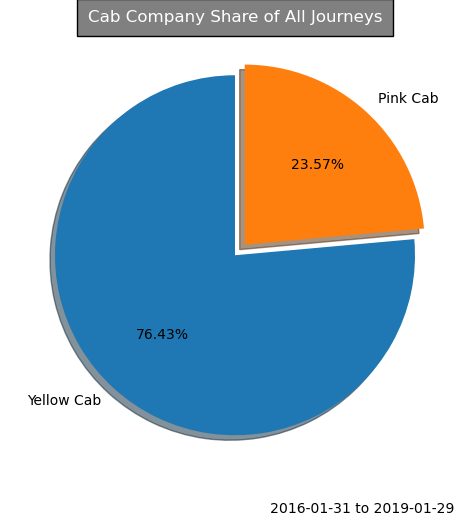

In [21]:
values = np.array([yellow_cab,pink_cab])
mlabels = ['Yellow Cab','Pink Cab']
plt.pie(values, labels=mlabels,  autopct='%1.2f%%', shadow=True, explode = [0,0.08],startangle=90)
plt.tight_layout()
plt.title("Cab Company Share of All Journeys", bbox={'facecolor':'gray', 'pad':8}, color='white')
plt.xlabel('''\n                                                           2016-01-31 to 2019-01-29 ''')

***Key Note:***
* The Yellow Cab is used a lot more by customers than the Pink Cab

In [ ]:
plt.figure(figsize = (16, 9))
order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

sns.countplot(x="days", hue="company", order=order, data=master_data,palette="Set2",edgecolor = "black")
 

plt.title('Daily Cab Usage', fontsize=25)
plt.ylabel('Frequency of Usage', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.show()

***Check each company's total cab transactions each month***

In [ ]:
pinkprofit=master_data[master_data.company=='Pink Cab'].groupby('months').company.count()
yellowprofit=master_data[master_data.company=='Yellow Cab'].groupby('months').company.count()
print("Pink Cab Profit:->\n", pinkprofit)
print("\nYellow Cab Profit:->\n", yellowprofit)

In [ ]:
plt.figure(figsize = (16, 9))
order=["January","February","March","April","May","June","July","August","September","October","November","December"]

sns.countplot(x="months", hue="company", data=master_data, order=order,palette="Set1",edgecolor = "black")
 

plt.title('Monthly Cab Usage', fontsize=25)
plt.ylabel('Frequency of Usage', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

***Key Note:***
* There is considerable seasonality in Cab Usage
* Cab usage rises almost steadily from February to January of the next year

***Check each company's total transcations per year***

In [ ]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x="years", hue="company", data=master_data)
plt.title('Yearly Cab Usage', fontsize=25)
plt.ylabel('Frequency of Patronage')
plt.show()

***We will now check each company's average profits per year and the difference between the two***

In [ ]:

yellowcab_profits = master_data[master_data['company']=='Yellow Cab'].groupby(master_data['years']).profits.mean()
pinkcab_profits = master_data[master_data['company']=='Pink Cab'].groupby(master_data['years']).profits.mean()
diff=yellowcab_profits-pinkcab_profits

fig = go.Figure(data=[
    go.Bar(
    x=['2016','2017','2018','2019'], 
    y=yellowcab_profits.values,
    name='Yellow Cab',
    marker_color='yellow'),
    go.Bar(
   x=['2016','2017','2018','2019'], 
    y=pinkcab_profits.values,
    name='Pink Cab',
    marker_color='#FF1493')
])

fig.add_trace(go.Bar(
   x=['2016','2017','2018','2019'], 
    y=diff.values,
    name='Difference',
    marker_color='burlywood'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,plot_bgcolor='grey',title = 'Average Profits Per Year',  title_x=0.5, 
                  yaxis_title="Average Profits Gained", xaxis_title="Year",)

display(fig)
difff = round(diff.mean(),2)
print("Average Difference: "+str(difff))


***Key Notes:***
* The Yellow Cab has its average profits being significantly higher than the Pink Cab's

In [ ]:
yellowcab_profits = master_data[master_data['company']=='Yellow Cab'].groupby(master_data['years']).profits.mean()
pinkcab_profits = master_data[master_data['company']=='Pink Cab'].groupby(master_data['years']).profits.mean()
plt.figure(figsize = (5, 3))

ax=plt.axes()
ax.set(facecolor = "grey")
plt.plot(['2016','2017','2018','2019'], pinkcab_profits.values, color='deeppink')
plt.plot(['2016','2017','2018','2019'], yellowcab_profits.values, color='yellow')
plt.title('Yearly Average Profit Trend', fontsize=15)
plt.ylabel('Average Profit',fontsize=10)
plt.xlabel('Year',fontsize=10)
plt.legend(['Pink Cab','Yellow cab'], facecolor="purple")
plt.figure(facecolor='yellow')
plt.show()

***Key Note:***
* Despite the Yellow Cab having much greater profits each year, its profits have been declining consistently from 2017 to 2019, whereas the Pink Cab's profits saw a surge from 2018 to 2019.

***We will now analyze each cab company's presence in various cities***

In [ ]:
city_data['percent'] = round((city_data['Users']/city_data['Population'])*100,2)

In [ ]:
fig = px.bar(city_data, x = 'City', y = 'percent', color = 'City', title = "Percentage of City Population Using The Two Cabs Companies' Services")
fig.update_layout(xaxis_tickangle=-45,plot_bgcolor='grey', title_x=0.4, yaxis_title="User Percentage", xaxis_title="City")
display(fig)

***Key Notes:***
* The two Cab companies have over 30% of the entire population of Washington DC, San Francisco and Boston using their services.
* However, there is a lot of room for growth, especially considering the fact that they have less than 10% of the people in each of the other cities using their services

***We will now check the cities where these companies have most of their users***

In [ ]:
cities = master_data.groupby('city').users.count()
index = cities.index
values = cities.values

fig = go.Figure(data=[go.Pie(labels=index, values=values,name="Cities")])

fig.update_traces( textinfo='percent+label',textfont_size=10, hoverinfo="label+value+name",
                  marker=dict(line=dict(color='grey', width=2)))

fig.update_layout(title_x=0.45, title_text="Cab Companies' Cities of Operation",
    annotations=[dict(text='', x=0.5, y=0.5, font_size=20, showarrow=False)],autosize=False,
    width=900,
    height=800, showlegend=False)

display(fig)

***Key Note:***
* New York, Chicago, Los Angeles, Washington, DC and Boston are the top 5 cities of operation for these two cab companies, with respect to number of users.

In [ ]:

yellow_profits_per_city = master_data[master_data['company']=='Yellow Cab'].groupby(master_data['city']).profits.mean()
pink_profits_per_city = master_data[master_data['company']=='Pink Cab'].groupby(master_data['city']).profits.mean()
diff=yellowcab_profits-pinkcab_profits

fig = go.Figure()
fig.add_trace(go.Bar(
    x=yellow_profits_per_city.index,
    y=yellow_profits_per_city.values,
    name='Yellow Cab',
    marker_color='yellow'
))
fig.add_trace(go.Bar(
   x=yellow_profits_per_city.index,
    y=pink_profits_per_city.values,
    name='Pink Cab',
    marker_color='#FF1493'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,plot_bgcolor='grey',title = 'Average Profits Per City',  title_x=0.5, 
                  yaxis_title="Average Profits", xaxis_title="City")
display(fig)

***Key Note:***
* The cities with most users are not necessarily the cities where the companies make the most average profit
* New York, Silicon Valley and Dallas yield the highest average profits for the Yellow Cab company and Dallas is replaced by Miami for the Pink Cab company 

***We will now analyze each company's customer retention***

In [ ]:
pink_cab = master_data[master_data['company']=='Pink Cab']
pink_cab_customers = pink_cab['customer_id']
yellow_cab = master_data[master_data['company']=='Yellow Cab']
yellow_cab_customers = yellow_cab['customer_id']

pink_val_counts = Counter(pink_cab_customers)

pink_val_and_counts_5 = {value: count for value, count in pink_val_counts.items() if count > 5}
pink_val_and_counts_5_perc = round(len(pink_val_and_counts_5)/len(pink_cab_customers)*100,2)
pink_val_and_counts_10 = {value: count for value, count in pink_val_counts.items() if count > 10}
pink_val_and_counts_10_perc = round(len(pink_val_and_counts_10)/len(pink_cab_customers)*100,2)
pink_val_and_counts_15 = {value: count for value, count in pink_val_counts.items() if count > 15}
pink_val_and_counts_15_perc = round(len(pink_val_and_counts_15)/len(pink_cab_customers)*100,2)

yellow_val_counts = Counter(yellow_cab_customers)

yellow_val_and_counts_5 = {value: count for value, count in yellow_val_counts.items() if count > 5}
yellow_val_and_counts_5_perc = round(len(yellow_val_and_counts_5)/len(yellow_cab_customers)*100,2)
yellow_val_and_counts_10 = {value: count for value, count in yellow_val_counts.items() if count > 10}
yellow_val_and_counts_10_perc = round(len(yellow_val_and_counts_10)/len(yellow_cab_customers)*100,2)
yellow_val_and_counts_15 = {value: count for value, count in yellow_val_counts.items() if count > 15}
yellow_val_and_counts_15_perc = round(len(yellow_val_and_counts_15)/len(yellow_cab_customers)*100,2)

In [ ]:
tb = pd.DataFrame({
    'Cab Company': ['Pink', 'Yellow'],
    '5+ Transaction Customers': [len(pink_val_and_counts_5), len(yellow_val_and_counts_5)],
    '5+ Retention Rate': [pink_val_and_counts_5_perc, yellow_val_and_counts_5_perc],
    '10+ Transaction Customers': [len(pink_val_and_counts_10), len(yellow_val_and_counts_10)],
    '10+ Retention Rate': [pink_val_and_counts_10_perc, yellow_val_and_counts_10_perc],
    '15+ Transaction Customers': [len(pink_val_and_counts_15), len(yellow_val_and_counts_15)],
    '15+ Retention Rate': [pink_val_and_counts_15_perc, yellow_val_and_counts_15_perc],
 })

fig = go.Figure(data=[go.Table(
    header=dict(values=list(tb.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[tb['Cab Company'],tb['5+ Transaction Customers'],tb['5+ Retention Rate'], 
                       tb['10+ Transaction Customers'], tb['10+ Retention Rate'],
               tb['15+ Transaction Customers'], tb['15+ Retention Rate']],
               fill_color='lavender',
               align='left'))])

display(fig)

***Key Notes:***
* 5.33% of the Yellow Cab company's customers returned at least 5 times, compared to 4.36% for the Pink Cab
* We notice a more significant difference when checking the percentage of customers who returned at least 10 times - 3.53% for the Yellow Cab company and only 0.28% for the Pink Cab company.
* At 15+ retention also, the Yellow Cab leads the way again, with 1.99% retention, compared to only 0.01% for the Pink Cab
* We can confidently conclude that the Yellow Cab has better customer retention

***We will now find the prevalent payment modes in each company's transactions***

In [ ]:
cash = master_data[master_data['payment_mode']=='Cash']
pinkcab_cash= round((len(cash[master_data['company']=='Pink Cab'])/len(master_data))*100,2)
yellowcab_cash= round((len(cash[master_data['company']=='Yellow Cab'])/len(master_data))*100,2)

card = master_data[master_data['payment_mode']=='Card']
pinkcab_card= round((len(card[master_data['company']=='Pink Cab'])/len(master_data))*100,2)
yellowcab_card= round((len(card[master_data['company']=='Yellow Cab'])/len(master_data))*100,2)

mode_value=[yellowcab_card, pinkcab_card, yellowcab_cash, pinkcab_cash]
mode_index =['Yellow Cab Card','Pink Cab Card','Yellow Cab Cash','Pink Cab Cash']

colors=['#FFFF00','#FF00FF','#DAA520','#9F2B68']


In [ ]:
fig = go.Figure(data=[go.Pie(labels=mode_index, values=mode_value,name="Payment Modes")])

# Use `hole` to create a donut-like pie chart
fig.update_traces(textfont_size=20, hole=.4, hoverinfo="label+percent+name",marker=dict(colors=colors, line=dict(color='grey', width=2)))

fig.update_layout(title_x=0.45, title_text="Payment Modes for Transactions",
    annotations=[dict(text='', x=0.5, y=0.5, font_size=20, showarrow=False)])
display(fig)

***Key Notes:***
* Cards are the preferred payment mode for customers
* Cards are used for payment 60% of the time, cash 40% - this is true for both Cab Companies.

In [ ]:
cities = master_data.groupby('city').profits.mean()
cities
fig = px.scatter(master_data, x='km_travelled', y='price_charged', trendline='ols',color='company', symbol='company')
fig.update_layout(title_x=0.6, yaxis_title = "Price Charged", title="Correlation Between Price Charged and Trip Distance", xaxis_title="Kilometers Travelled")

display(fig)

***Key Note:***
* As expected, there is a positive correlation between Price Charged and the Distance travelled.

***We will now print a heatmap to see the correlation between all features***

In [ ]:
correlation_matrix = master_data.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

***Key Notes:***
* As expected, there is a strong correlation between Population and Users, as well as between Distance Travelled, Cost of Trip and Price Charged.
* As expected, again, there is a strong correlation between Transaction ID and the Years of the transactions.
    + A transaction at a later date would comprise of a greater number for its Transaction ID.

## PHASE 6: ACT

### RECOMMENDATIONS

* General reasons for XYZ to definitely make an investment:
    + The Cab companies collectively serve more than 30% of the total population in Washington DC, San Francisco, and Boston. Nevertheless, there exists significant potential for expansion, particularly given that their service utilization remains below 10% of the population in each of the other cities.



* I suggest that XYZ considers investing in the Yellow Cab company due to the following factors:
    + The Yellow Cab company exhibits a significantly superior customer retention rate compared to the Pink Cab. This implies that even during challenging periods, the Yellow Cab has a higher likelihood of enduring due to the strong customer loyalty it enjoys.
    + The Yellow Cab stands as the preferred choice for most customers, with its share amounting to 274,681 out of the total 359,392 transactions in the dataset. This dominance translates to 76.43% of all cab journeys, outshining the Yellow Cab's 84,711 journeys, which make up a mere 23.57%.
    + The Yellow Cab boasts notably higher average profits. Throughout the span of four years, there exists an average profit gap of $89.86 in favor of the Yellow Cab.
    
* Notable Drawback:
    + In spite of the Yellow Cab's notably higher annual profits, its earnings have shown a consistent decline from 2017 to 2019. Conversely, the Pink Cab experienced a surge in profits between 2018 and 2019.



